In [1]:
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for Pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# for Dimensionality reduction
from sklearn.decomposition import PCA

#for Models development 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

#for validation
from sklearn.model_selection import cross_val_score,KFold


#for model Evaluation 
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report,matthews_corrcoef

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv('Ov_fullprots.csv')
data

,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_type,Info_window,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,6282,CAA31690.1,1,R,NaN,NaN,0,0,NaN,RTTTMKIL,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,6282,CAA31690.1,2,T,NaN,NaN,0,0,NaN,RTTTMKILF,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,6282,CAA31690.1,3,T,NaN,NaN,0,0,NaN,RTTTMKILFC,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,6282,CAA31690.1,4,T,NaN,NaN,0,0,NaN,RTTTMKILFCL,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,6282,CAA31690.1,5,M,NaN,NaN,0,0,NaN,RTTTMKILFCLL,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,6282,AAB96970.1,648,T,NaN,NaN,0,0,NaN,EEKLIVSTKKQS,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,6282,AAB96970.1,649,K,NaN,NaN,0,0,NaN,EKLIVSTKKQS,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,6282,AAB96970.1,650,K,NaN,NaN,0,0,NaN,KLIVSTKKQS,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,6282,AAB96970.1,651,Q,NaN,NaN,0,0,NaN,LIVSTKKQS,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AE7D754288>],
      dtype=object)

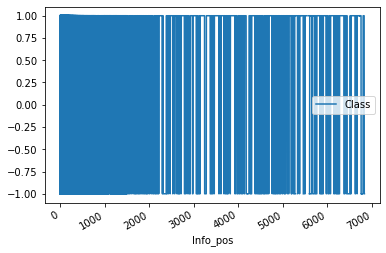

In [6]:


data.set_index('Info_pos')[['Info_protein_id','Info_AA','Info_split','Class']].plot(subplots=True)

In [3]:
#Check for missing values 

data.isnull().sum().sort_values(ascending=False)

Class               28528
Info_epitope_id     28528
Info_host_id        28528
Info_type           28528
feat_KF6                0
                    ...  
feat_VHSE8              0
feat_ProtFP1            0
feat_ProtFP2            0
feat_ProtFP3            0
Info_organism_id        0
Length: 94, dtype: int64

In [9]:
# checking missing percentages 

missing_percentages = data.isnull().sum().sort_values(ascending=False) / len(data)
missing_percentages

Class               0.410646
Info_epitope_id     0.410646
Info_host_id        0.410646
Info_type           0.410646
feat_KF6            0.000000
                      ...   
feat_VHSE8          0.000000
feat_ProtFP1        0.000000
feat_ProtFP2        0.000000
feat_ProtFP3        0.000000
Info_organism_id    0.000000
Length: 94, dtype: float64

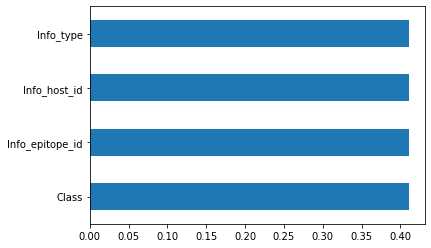

In [10]:
# visualization of null values 
missing_percentages[missing_percentages !=0].plot(kind='barh')

# Removing  the irrelevant features from the dataset.

In [4]:
data=data.drop("Info_organism_id", axis=1)
data=data.drop("Info_epitope_id", axis=1)
data=data.drop("Info_host_id", axis=1)
data=data.drop("Info_nPos", axis=1)
data=data.drop("Info_nNeg", axis=1)
data=data.drop("Info_type", axis=1)
data=data.drop("Info_window", axis=1)

#Trying out Info_protein_id
#data=data.drop("Info_protein_id", axis=1)

In [5]:
data

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,CAA31690.1,1,R,CV2,NaN,2.405639,41,92,12,19,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,CAA31690.1,2,T,CV2,NaN,2.641604,50,103,13,21,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,CAA31690.1,3,T,CV2,NaN,2.846439,53,110,14,23,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,CAA31690.1,4,T,CV2,NaN,2.845351,59,123,15,25,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,CAA31690.1,5,M,CV2,NaN,2.792481,65,136,16,27,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,AAB96970.1,648,T,CV5,NaN,2.855389,60,130,16,32,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,AAB96970.1,649,K,CV5,NaN,2.845351,55,121,15,28,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,AAB96970.1,650,K,CV5,NaN,2.646439,50,112,14,24,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,AAB96970.1,651,Q,CV5,NaN,2.725481,44,98,12,22,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


In [5]:
#Check for missing values after removing Info_ features

data.isnull().sum().sort_values(ascending=False)

Class              28528
feat_MSWHIM3           0
feat_KF8               0
feat_PP3               0
feat_KF1               0
                   ...  
feat_ProtFP2           0
feat_ProtFP3           0
feat_ProtFP4           0
feat_ProtFP5           0
Info_protein_id        0
Length: 87, dtype: int64


# Label encoding 


In [6]:
# Converting string to float so that data could be fit on for scaling
le = LabelEncoder()
data['Info_protein_id']=le.fit_transform(data['Info_protein_id'])
data['Info_AA']=le.fit_transform(data['Info_AA'])
data['Info_split']=le.fit_transform(data['Info_split'])

In [7]:
data

,Info_protein_id,Info_pos,Info_AA,Info_split,Class,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,...,feat_BLOSUM4,feat_BLOSUM5,feat_BLOSUM6,feat_BLOSUM7,feat_BLOSUM8,feat_BLOSUM9,feat_BLOSUM10,feat_MSWHIM1,feat_MSWHIM2,feat_MSWHIM3
0,166,1,14,1,NaN,2.405639,41,92,12,19,...,-0.226250,0.228750,0.303750,0.001250,-0.626250,-0.101250,-0.080000,-0.602500,0.681250,-0.225000
1,166,2,16,1,NaN,2.641604,50,103,13,21,...,-0.132222,0.142222,0.302222,-0.001111,-0.545556,-0.042222,-0.214444,-0.451111,0.700000,-0.237778
2,166,3,16,1,NaN,2.846439,53,110,14,23,...,-0.038000,0.311000,0.167000,-0.075000,-0.453000,-0.050000,-0.203000,-0.472000,0.656000,-0.241000
3,166,4,16,1,NaN,2.845351,59,123,15,25,...,-0.050000,0.285455,0.182727,-0.058182,-0.398182,-0.085455,-0.186364,-0.496364,0.661818,-0.233636
4,166,5,10,1,NaN,2.792481,65,136,16,27,...,-0.060000,0.264167,0.195833,-0.044167,-0.352500,-0.115000,-0.172500,-0.516667,0.666667,-0.227500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,139,648,16,4,NaN,2.855389,60,130,16,32,...,-0.257500,0.137500,0.191667,-0.176667,-0.156667,0.286667,-0.056667,-0.465000,0.405833,-0.205000
69467,139,649,8,4,NaN,2.845351,55,121,15,28,...,-0.248182,0.175455,0.216364,-0.100909,-0.203636,0.242727,-0.089091,-0.529091,0.478182,-0.220000
69468,139,650,8,4,NaN,2.646439,50,112,14,24,...,-0.237000,0.221000,0.246000,-0.010000,-0.260000,0.190000,-0.128000,-0.606000,0.565000,-0.238000
69469,139,651,13,4,NaN,2.725481,44,98,12,22,...,-0.168889,0.154444,0.262222,-0.034444,-0.303333,0.191111,-0.047778,-0.616667,0.618889,-0.331111


# Selecting target feature

In [8]:
x=data.drop(['Class'], axis=1) #axis=1 means we are working with columns and axis=0 means rows
y=data['Class']

# Class distribution


In [38]:
class_count = y.value_counts()
class_count

 1.0    28722
-1.0    12221
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x2909e1c22c8>,
 [Text(-0.6507832691638026, 0.8868377171593876, '1.0'),
  Text(0.6507832691638028, -0.8868377171593874, '-1.0')],
 [Text(-0.354972692271165, 0.48372966390512045, '70.15'),
  Text(0.3549726922711651, -0.48372966390512034, '29.85')])

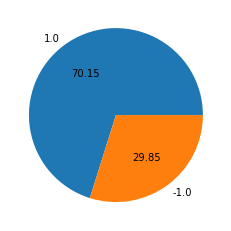

In [39]:
#Class distribution visualization approch 2 using matplotlib library 
import matplotlib.pyplot as plt
fig1, ax1 =plt.subplots()
ax1.pie(y.value_counts(),autopct='%.2f', labels=class_count.index) # %.2f give us the values in 2 digits

In [13]:
data['Info_protein_id'].describe()

count          69471
unique           182
top       A0A044UK00
freq           12628
Name: Info_protein_id, dtype: object

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69471 entries, 0 to 69470
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Info_protein_id        69471 non-null  int32  
 1   Info_pos               69471 non-null  int64  
 2   Info_AA                69471 non-null  int32  
 3   Info_split             69471 non-null  int32  
 4   feat_seq_entropy       69471 non-null  float64
 5   feat_C_atoms           69471 non-null  int64  
 6   feat_H_atoms           69471 non-null  int64  
 7   feat_N_atoms           69471 non-null  int64  
 8   feat_O_atoms           69471 non-null  int64  
 9   feat_S_atoms           69471 non-null  int64  
 10  feat_molecular_weight  69471 non-null  float64
 11  feat_Perc_Tiny         69471 non-null  float64
 12  feat_Perc_Small        69471 non-null  float64
 13  feat_Perc_Aliphatic    69471 non-null  float64
 14  feat_Perc_Aromatic     69471 non-null  float64
 15  fe

# Scalling


In [9]:
scaler= StandardScaler()
x_std =scaler.fit_transform(x)

In [17]:
x_std

array([[ 1.79844834, -0.47739871,  0.86967711, ..., -1.93921074,
         1.89479541,  0.87517252],
       [ 1.79844834, -0.47704403,  1.2297671 , ..., -0.96925811,
         2.01019471,  0.79359643],
       [ 1.79844834, -0.47668935,  1.2297671 , ..., -1.10309377,
         1.73939103,  0.77302506],
       ...,
       [ 1.23998229, -0.24721131, -0.21059285, ..., -1.96163533,
         1.17931981,  0.79217771],
       [ 1.23998229, -0.24685663,  0.68963212, ..., -2.02997695,
         1.51098592,  0.19773628],
       [ 1.23998229, -0.24650195,  1.04972211, ..., -1.93120196,
         1.43319825,  0.061185  ]])

# Principal Component Analysis (PCA)

In [10]:
pca=PCA(n_components=0.95)
pca.fit_transform(x_std)

array([[ 0.18589924, -4.2666987 ,  2.85277172, ...,  1.10443377,
         3.14476628, -0.1352387 ],
       [-1.05501491, -5.99162813,  2.14878988, ...,  1.06248433,
         2.59706905,  0.57393174],
       [-0.14022834, -5.79028126,  2.21389075, ...,  0.84707802,
         2.30259439,  1.01553354],
       ...,
       [-0.06720337, -1.38794731,  3.58462201, ..., -1.20109402,
         0.78351076, -0.15982633],
       [ 2.17275979, -1.61709355,  2.01972982, ..., -0.3829841 ,
         0.77341433,  0.30557876],
       [ 2.23621812,  0.43671026,  2.70378343, ..., -0.88940239,
         0.44533448,  0.69043373]])

In [15]:
PCA=pca.fit_transform(x_std)
PCA_DF=pd.DataFrame(data=PCA, 
                    columns=['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8','PCA 9','PCA 10','PCA 11','PCA 12','PCA 13','PCA 14','PCA 15','PCA 16','PCA 17'])

In [18]:
PCA_DF.columns

Index(['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8',
       'PCA 9', 'PCA 10', 'PCA 11', 'PCA 12', 'PCA 13', 'PCA 14', 'PCA 15',
       'PCA 16', 'PCA 17'],
      dtype='object')

In [29]:
PCA_DF

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17
0,0.185899,-4.266699,2.852772,-4.941798,5.252183,-0.819324,2.954763,-0.622384,1.010544,-1.380125,4.570752,4.043916,6.533219,3.502235,1.104434,3.144766,-0.135239
1,-1.055015,-5.991628,2.148790,-2.399972,3.803889,-1.252566,2.387833,-1.499776,0.620310,-1.196306,4.609718,3.551189,5.265714,3.085527,1.062484,2.597069,0.573932
2,-0.140228,-5.790281,2.213891,-1.278312,4.101851,-2.346156,4.800609,-0.876142,-0.426717,-1.676358,3.576969,2.499459,4.162332,2.995469,0.847078,2.302594,1.015534
3,-0.142790,-6.944920,1.678160,-1.943382,2.982737,-1.711953,4.189329,-0.717445,-0.572875,-1.616628,3.371258,1.747209,3.186260,2.408867,1.301586,2.232727,0.825004
4,-0.203494,-7.896843,1.209433,-2.519129,1.950302,-1.142775,3.718989,-0.597468,-0.776303,-1.481756,3.185219,1.050089,2.078520,1.925419,0.890164,2.519422,0.132408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69466,-2.232473,1.517846,0.908555,-5.169273,1.287369,1.209724,-0.233739,-1.045949,1.448179,-0.435373,2.457187,1.274372,4.025228,-0.165918,0.237382,0.343766,0.426778
69467,-1.206550,0.197509,2.127429,-5.508448,2.317389,0.860181,-0.256374,-0.965498,1.361881,-0.202365,3.363532,2.234447,4.342746,0.159625,-0.963089,0.868653,-0.194700
69468,-0.067203,-1.387947,3.584622,-5.909488,3.688678,0.477496,-0.475425,-0.893432,1.479141,-0.172001,4.342812,3.193581,4.964913,0.593542,-1.201094,0.783511,-0.159826
69469,2.172760,-1.617094,2.019730,-5.637385,4.222924,-0.072960,-0.226663,-0.794160,1.927384,0.157854,4.323164,3.553427,5.806681,1.226126,-0.382984,0.773414,0.305579


In [16]:
Final_DF=pd.concat([PCA_DF, data[['Class']]], axis=1)

In [28]:
# fig=plt.figure(figsize=(12,12))
# ax=fig.add_subplot(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,)
# ax.set_xlabel('PCA_DF', fontsize=15)
# ax.set_ylabel('y', fontsize=15)
# targets=data[['Class']
# # colors=['r','g','b']
# # markers=[",","o","v"]
# #for targets,colors,markers in zip(targets,colors,markers):
             
# for targets in zip(targets):
#              indicesTokeep =Final_DF['Class']==Class
#              ax.scatter(Final_DF.loc[indicesTokeep, PCA_DF.columns],
#                        Final_DF.loc[indicesTokeep, PCA_DF.columns],
#                        c= color, marker=markers)
             
# ax.legend(Class)
# ax.grid()

In [11]:
pca.explained_variance_ratio_ 

array([0.24166542, 0.15934738, 0.11481953, 0.09111363, 0.06970506,
       0.0677064 , 0.03775191, 0.02764062, 0.02519086, 0.02230234,
       0.02106306, 0.01757514, 0.01553147, 0.0140559 , 0.01102968,
       0.01038852, 0.01008697])

In [30]:
#Factor loading
#This will be the ingredients of the linear combinations from the original data set to our 17 PCA
#So It's going to be 85 by 17 matrix mapping the original 85 variables to our PCA
pca.components_

array([[ 0.00095259, -0.0085858 , -0.00975744, ..., -0.1167725 ,
         0.01013593, -0.16484473],
       [-0.00301151,  0.01837122, -0.01972781, ...,  0.0561683 ,
        -0.20051178, -0.03361024],
       [ 0.03141681, -0.04422319,  0.0075389 , ..., -0.03912723,
        -0.00583959,  0.12694149],
       ...,
       [-0.1148184 ,  0.0206198 ,  0.71751666, ..., -0.03952716,
         0.02151047, -0.02974878],
       [ 0.63821303,  0.22136266, -0.35800855, ..., -0.01270921,
         0.03716189,  0.01594813],
       [ 0.57674494,  0.24498924,  0.47701267, ...,  0.04800525,
        -0.04951352,  0.0452105 ]])

In [12]:
# Following wil tell, how many components we got, which is bascially given data columns(features)
pca.n_components_

17

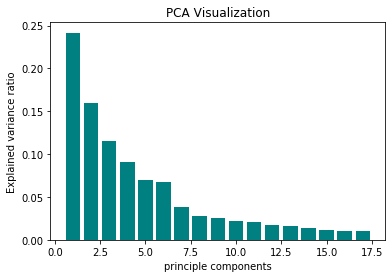

In [13]:
#Visualization of explained variance ratio

%matplotlib inline
plt.bar(range(1,18), pca.explained_variance_ratio_, color='teal')
plt.title("PCA Visualization")
plt.xlabel('principle components')
plt.ylabel('Explained variance ratio')
plt.show()

Here PCA has selcted 17 features . All these  features are computed column. They are the new feature, so that now we can use this features for further pre-processing.

In [34]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 95)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x_std)
    kmeanModel.fit(x_std)
  
    distortions.append(sum(np.min(cdist(x_std, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x_std.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(x_std, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x_std.shape[0]
    mapping2[k] = kmeanModel.inertia_

KeyboardInterrupt: 